### Task 1
$$(\sqrt{x+alpha} - \sqrt{x})(\sqrt{x+alpha} + \sqrt{x}) = a$$
$$ f = \sqrt{x + alpha} - \sqrt{x} = \frac{(\sqrt{x+alpha} - \sqrt{x})(\sqrt{x+alpha} + \sqrt{x})}{\sqrt{x+alpha} + \sqrt{x}} = \frac{alpha}{\sqrt{x+alpha} + \sqrt{x}}$$

### Task 2

In [1]:
! pip install mpmath
from mpmath import mp

mp.dps = 64
print(mp.tan(mp.power(10, 100)))
mp.power(10, 100) / (mp.power(mp.cos(mp.power(10, 100)), 100) * mp.tan(mp.power(10, 100)))
print("Solution: 107")

0.4320458056166690197593783572604528727053527543871788951777017692
Solution: 107


### Task 3 (solve_quad)

In [2]:
import numpy as np

def solve_quad(b: float, c: float) -> tuple[float, float]:
    d = b ** 2 - 4 * c
    d_sqrt = np.sqrt(np.abs(d))
    if d == 0:
        return -b/2, -b/2

    if d < 0:
        return -(b + 1j*d_sqrt)/2, -(b - 1j*d_sqrt)/2
    else:
        return -(b + d_sqrt)/2, -(b - d_sqrt)/2

tests = [{ 'b': -2 , 'c': 1},
        { 'b': 4.0 , 'c': 3.0} ,
        { 'b': 2.0 , 'c' : 1.0} ,
        { 'b': 0.5 , 'c': 4.0} ,
        { 'b': 1e10 , 'c': 3.0} ,
        { 'b': -1e10 , 'c': 4.0}]


for test in tests:
    print(solve_quad(**test), np.roots([1, test['b'], test['c']]))

(1.0, 1.0) [1. 1.]
(-3.0, -1.0) [-3. -1.]
(-1.0, -1.0) [-1. -1.]
((-0.25-1.984313483298443j), (-0.25+1.984313483298443j)) [-0.25+1.98431348j -0.25-1.98431348j]
(-10000000000.0, -0.0) [-1.e+10 -3.e-10]
(-0.0, 10000000000.0) [1.e+10 4.e-10]


### Task 4 (Polynomial)

/usr/local/anaconda3/envs/OptimizerEnv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


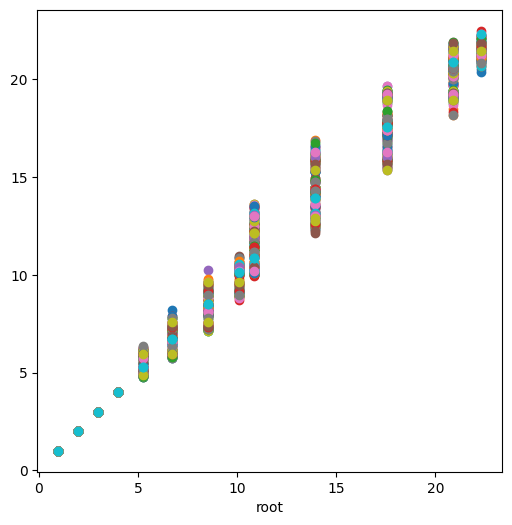

/usr/local/anaconda3/envs/OptimizerEnv/lib/python3.10/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


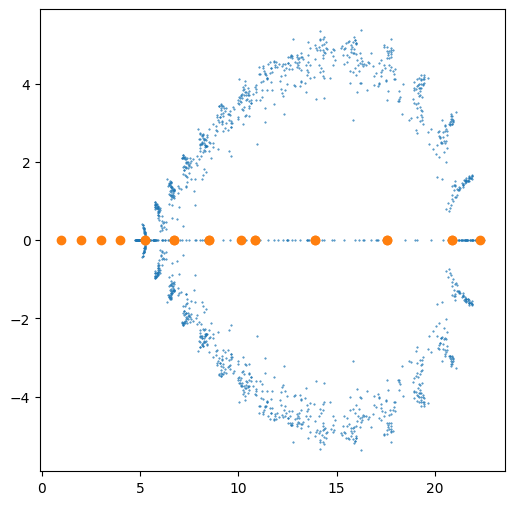

In [3]:
import matplotlib.pyplot as plt

NUMBER_OF_SIM = 100
roots = np.arange(1, 21)
coffs = np.polynomial.polynomial.polyfromroots(roots)

real = np.zeros((20, 100))
imag = np.zeros_like(real)
for i in range(NUMBER_OF_SIM):
    poly = np.polynomial.Polynomial(coffs * np.random.normal(1, 10**-10, 21))
    roots = poly.roots()
    real[:,i] = roots.real
    imag[:,i] = roots.imag

plt.figure(figsize=(6, 6))
# plt.scatter(real.flatten(), imag.flatten(), s=0.2)
plt.plot(roots, real, 'o', label='real part')
plt.xlabel('root')
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(real.flatten(), imag.flatten(), s=0.2)
plt.scatter(roots, np.zeros(20))
plt.show()

### Task 5 (recurent computing)

Последний вопрос: с помощью разложения логарифма в ряд Тейлора

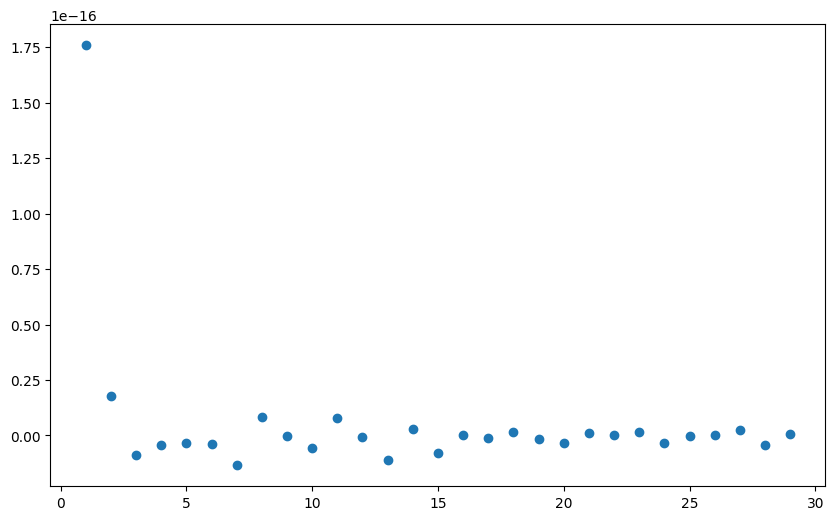

In [14]:
import mpmath
from matplotlib import pyplot as plt

def numpy_calculation(n, alpha):
    f = np.zeros(n, dtype=np.float64)
    f[0] = np.log(1 + (1/np.float64(alpha))) # Init sol
    for arrow in range(1, n):
        f[arrow] = 1/np.float64(arrow) - np.float64(alpha) * f[arrow-1]
    return f

def mpmath_calculation(n, alpha):
    mpmath.mp.dps = 64
    f = mpmath.mp.zeros(1, n)
    f[0] = mpmath.mp.log(1 + (1/mpmath.mpf(alpha)))  # Init sol
    for arrow in range(1, n):
        f[arrow] = 1/mpmath.mpf(arrow) - mpmath.mpf(alpha) * f[arrow-1]
    return f

plt.figure(figsize=(10, 6))
N_RANGE = range(1, 30)
ALPHA = 0.1
difference = [numpy_calculation(n, ALPHA) - mpmath_calculation(n, ALPHA) for n in N_RANGE]
plt.plot(N_RANGE, [_[-1] for _ in difference], 'o')
plt.show()

### Task 6